In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# Importing modules

# lstm model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv


# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [72]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# get the features from the file features.txt
features = list()
with open('data/UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [3]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, BatchNormalization,Flatten
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [4]:
# get the data from txt files to pandas dataframe
X_train = pd.read_csv('data/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = features

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('data/UCI HAR Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('data/UCI HAR Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
3362,0.300961,-0.019358,-0.116926,-0.365882,0.040674,-0.172143,-0.370602,0.031904,-0.176276,-0.347767,...,-0.788069,-0.45848,0.355988,0.327441,-0.758617,0.134131,0.188508,17,1,WALKING


In [5]:
train.shape

(7352, 564)

In [6]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('data/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = features

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('data/UCI HAR Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('data/UCI HAR Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
535,0.27537,-0.017071,-0.109618,-0.991278,-0.991405,-0.988306,-0.991851,-0.99099,-0.986651,-0.935149,...,0.077995,0.15524,0.127278,0.115629,0.561204,-0.855441,-0.136004,4,6,LAYING


In [7]:
test.shape

(2947, 564)

In [8]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

In [9]:

print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [10]:
#Checking for NaN/null values
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [11]:
#Check for data imbalance
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

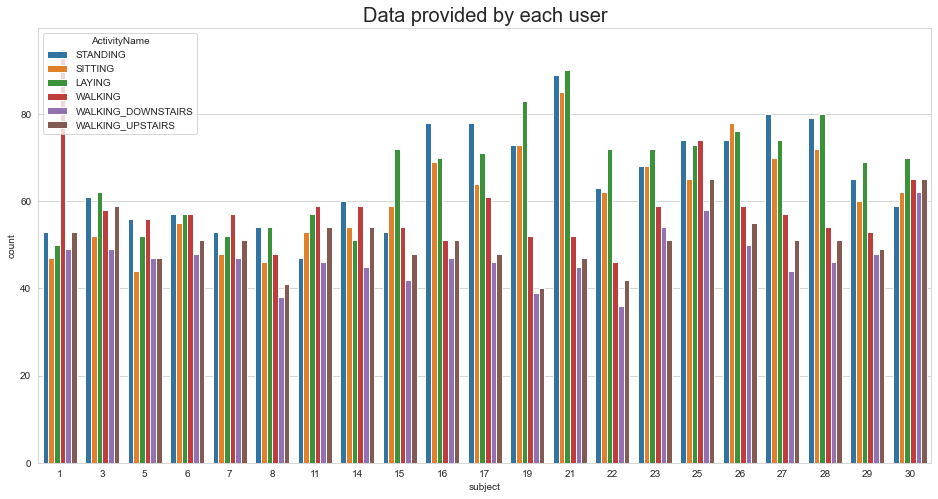

In [12]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

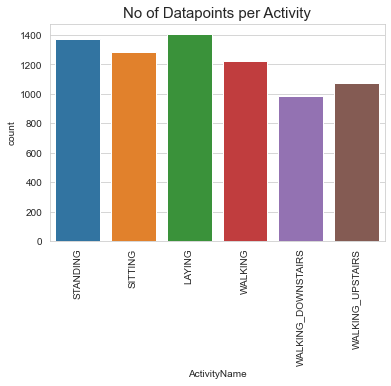

In [13]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

In [14]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '_')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc_mean_X', 'tBodyAcc_mean_Y', 'tBodyAcc_mean_Z',
       'tBodyAcc_std_X', 'tBodyAcc_std_Y', 'tBodyAcc_std_Z', 'tBodyAcc_mad_X',
       'tBodyAcc_mad_Y', 'tBodyAcc_mad_Z', 'tBodyAcc_max_X',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

In [15]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

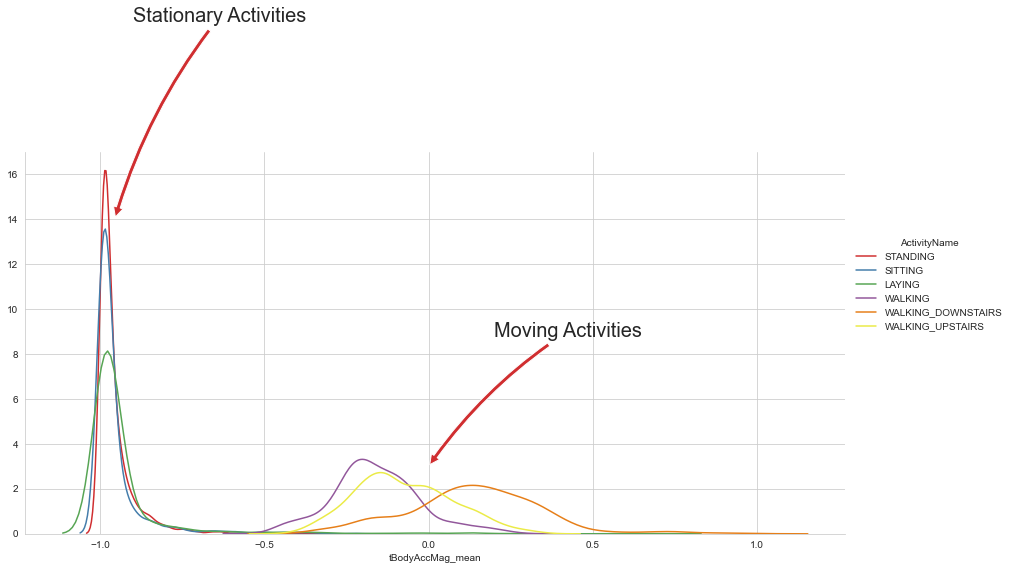

In [16]:
# Exploratory Data Analysis
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag_mean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,14), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

In [17]:
# # for plotting purposes taking datapoints of each activity to a different dataframe
# df1 = train[train['Activity']==1]
# df2 = train[train['Activity']==2]
# df3 = train[train['Activity']==3]
# df4 = train[train['Activity']==4]
# df5 = train[train['Activity']==5]
# df6 = train[train['Activity']==6]

# plt.figure(figsize=(14,7))
# plt.subplot(2,2,1)
# plt.title('Stationary Activities(Zoomed in)')
# sns.distplot(df4['tBodyAccMag_mean'],color = 'r',hist = False, label = 'Sitting')
# sns.distplot(df5['tBodyAccMag_mean'],color = 'm',hist = False,label = 'Standing')
# sns.distplot(df6['tBodyAccMag_mean'],color = 'c',hist = False, label = 'Laying')
# plt.axis([-1.01, -0.5, 0, 35])
# plt.legend(loc='center')

# plt.subplot(2,2,2)
# plt.title('Moving Activities')
# sns.distplot(df1['tBodyAccMag_mean'],color = 'red',hist = False, label = 'Walking')
# sns.distplot(df2['tBodyAccMag_mean'],color = 'blue',hist = False,label = 'Walking Up')
# sns.distplot(df3['tBodyAccMag_mean'],color = 'green',hist = False, label = 'Walking down')
# plt.legend(loc='center right')


# plt.tight_layout()
# plt.show()

## 3. Magnitude of an acceleration can saperate it well

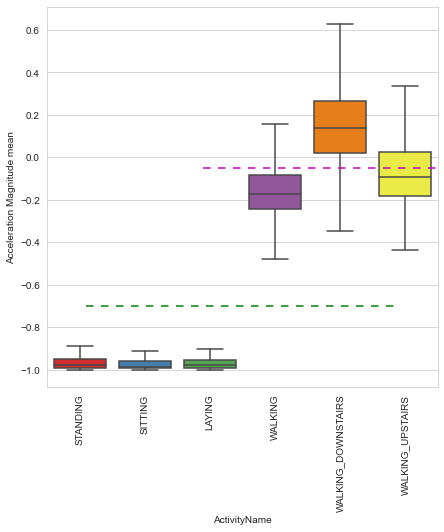

In [17]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMag_mean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()


### Observations:

If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.

If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.

If tAccMean > 0.0 then the Activity is WalkingDownstairs.

We can classify 75% the Acitivity labels with some errors.

## 4. Position of GravityAccelerationComponants also matters

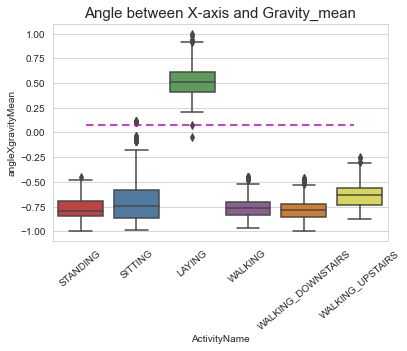

In [18]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

### Observations:

If angleX,gravityMean > 0 then Activity is Laying.

We can classify all datapoints belonging to Laying activity with just a single if else statement.

In [19]:
# sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
# plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
# plt.xticks(rotation = 40)
# plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
# plt.show()

# Apply t-sne on the data

In [20]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.009s...
[t-SNE] Computed neighbors for 7352 samples in 3.410s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635854
[t-SNE] Computed conditional probabilities in 0.106s
[t-SNE] Iteration 50: error = 124.7469864, gradient norm = 0.0294732 (50 iterations in 5.531s)
[t-SNE] Iteration 100: error = 107.1402740, gradient norm = 0.0280808 (50 iterations in 

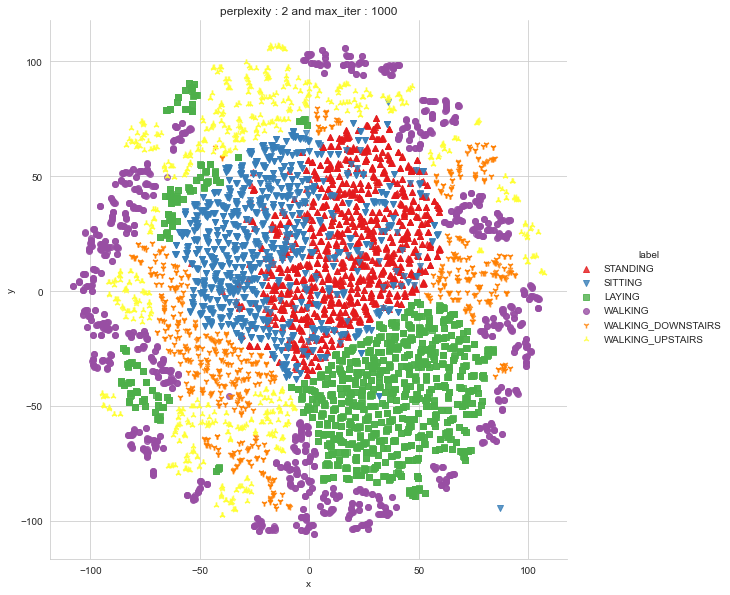

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.009s...
[t-SNE] Computed neighbors for 7352 samples in 3.888s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.147s
[t-SNE] Iteration 50: error = 114.1002579, gradient norm = 0.0190056 (50 iterations in 9.541s)
[t-SNE] Iteration 100: error = 98.5225983, gradient norm = 0.0153757 (50 iteration

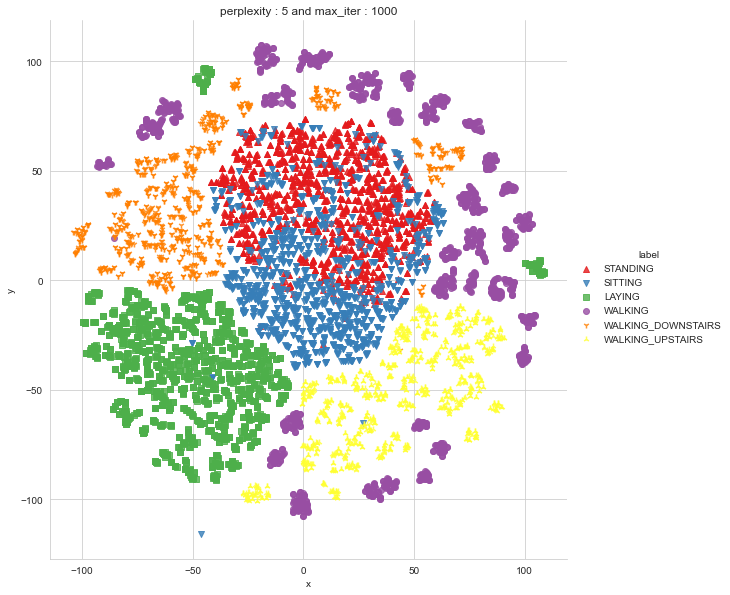

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.014s...
[t-SNE] Computed neighbors for 7352 samples in 4.443s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.428s
[t-SNE] Iteration 50: error = 105.6927948, gradient norm = 0.0181510 (50 iterations in 9.376s)
[t-SNE] Iteration 100: error = 90.5674591, gradient norm = 0.0126347 (50 iteratio

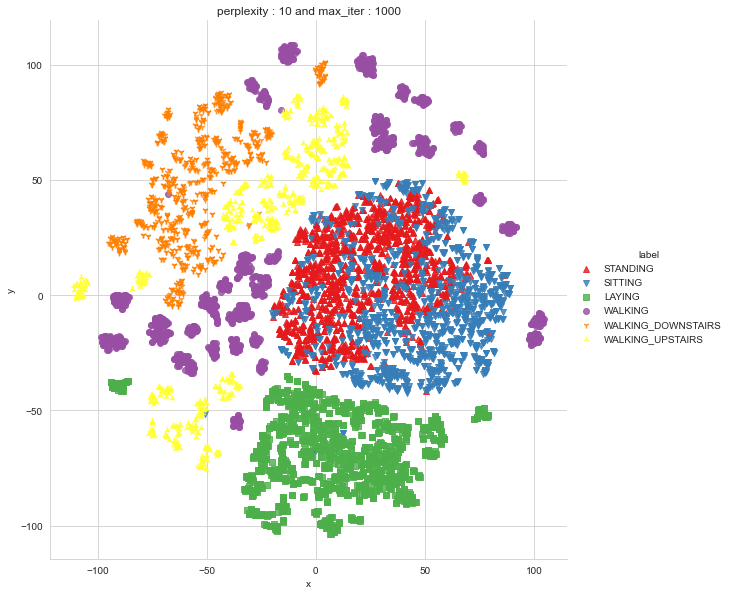

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.009s...
[t-SNE] Computed neighbors for 7352 samples in 3.929s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.732s
[t-SNE] Iteration 50: error = 98.1562195, gradient norm = 0.0074944 (50 iterations in 7.916s)
[t-SNE] Iteration 100: error = 84.5979156, gradient norm = 0.0079590 (50 iteration

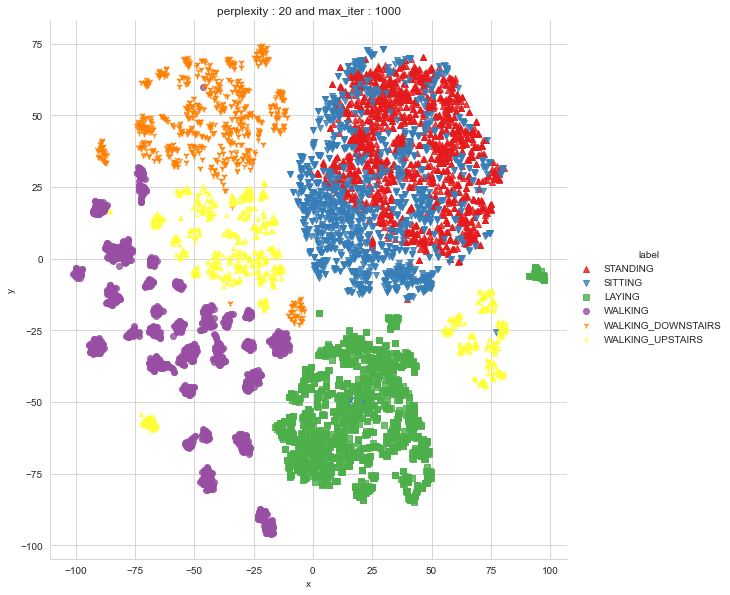

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.010s...
[t-SNE] Computed neighbors for 7352 samples in 3.823s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 1.658s
[t-SNE] Iteration 50: error = 86.9517365, gradient norm = 0.0151681 (50 iterations in 7.576s)
[t-SNE] Iteration 100: error = 76.0110397, gradient norm = 0.0047787 (50 iteratio

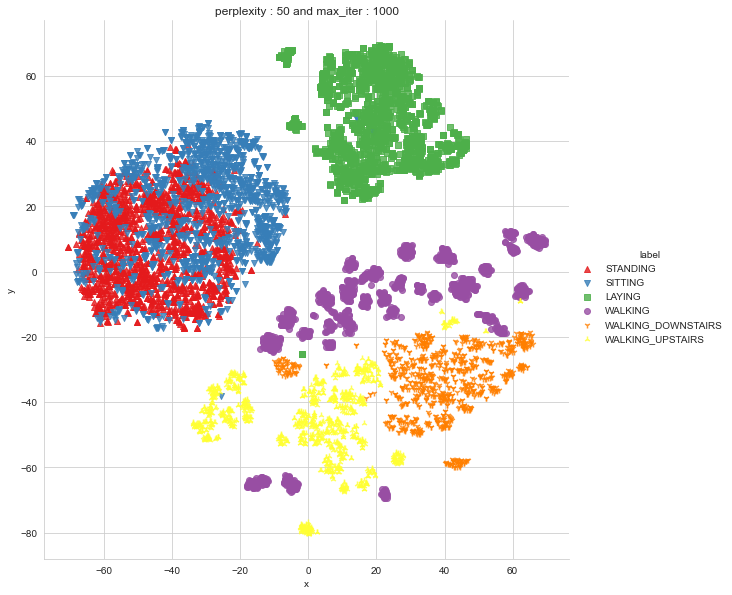

Done


In [22]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

In [23]:
#train = pd.read_csv('UCI_HAR_Dataset/csv_files/train.csv')
#test = pd.read_csv('UCI_HAR_Dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [24]:
train.head(1)

,tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING


In [25]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [26]:

# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [27]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Let's model with our data

In [39]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot the confusion matrix

In [28]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [29]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

### Method to print the gridsearch Attributes

In [38]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

# 1. Logistic Regression with Grid Search

In [34]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:00:11.173454


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.007520


---------------------
|      Accuracy      |
---------------------

    0.9579233118425518


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 430  58   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 403  13]
 [  0   0   0  24   2 445]]


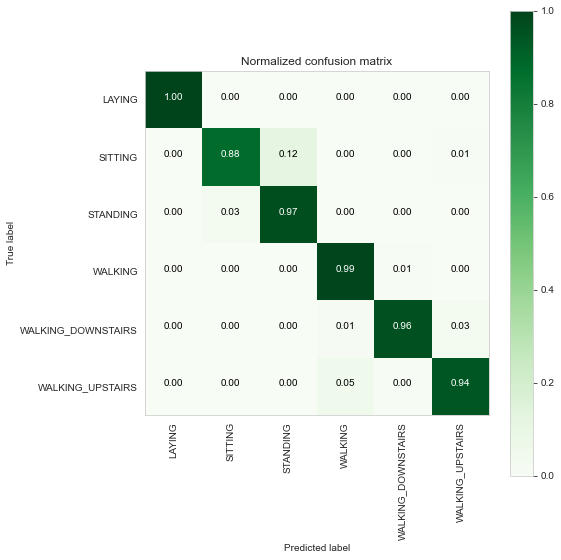

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [34]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

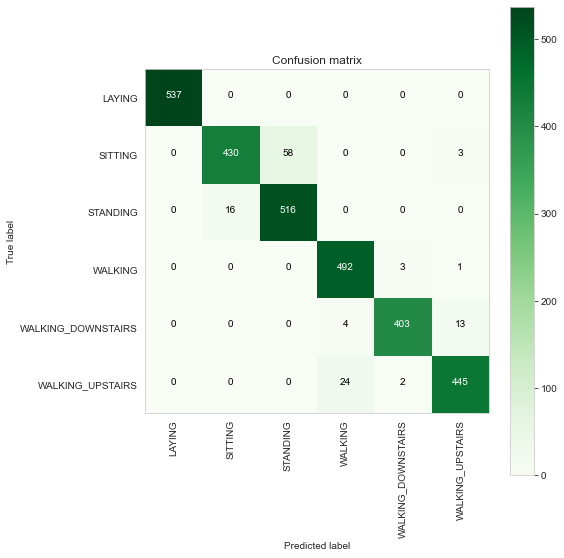

In [35]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [36]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9370255650199697



## 2.  SVC with GridSearch

In [35]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
#X_trains,X_tests=standardise(X_train,X_test)
#X_trains,X_tests = reduce_pca(X_train,X_test,330)


training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:33:10.745715


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.127261


---------------------
|      Accuracy      |
---------------------

    0.9392602646759416


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 418  70   0   0   3]
 [  0  31 501   0   0   0]
 [  0   0   0 486   5   5]
 [  0   0   1   8 386  25]
 [  0   1   0  25   5 440]]


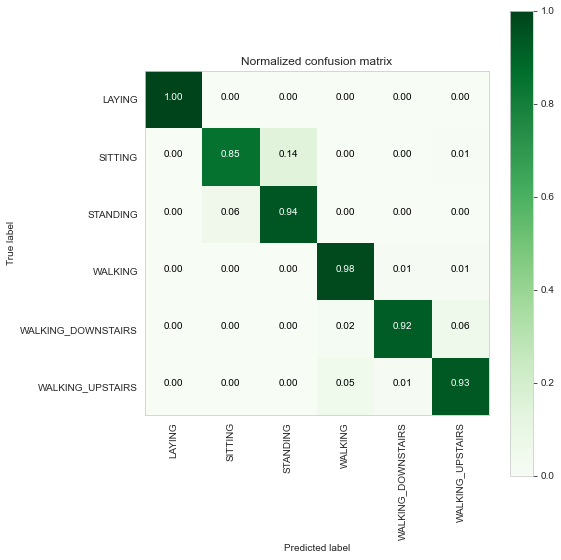

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.93      0.85      0.89       491
          STANDING       0.88      0.94      0.91       532
           WALKING       0.94      0.98      0.96       496
WALKING_DOWNSTAIRS       0.97      0.92      0.95       420
  WALKING_UPSTAIRS       0.93      0.93      0.93       471

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947



In [40]:
parameters = {'C':[0.05,0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=8, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
print_grid_search_attributes(lr_svc_grid_results['model'])

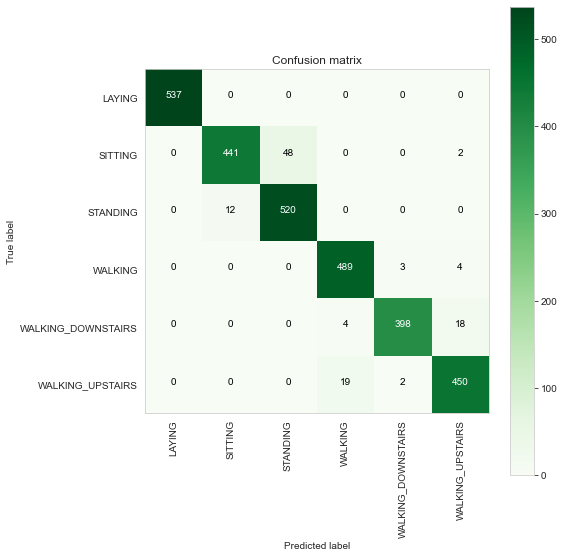

In [255]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(lr_svc_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

## 3. Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:05:10.197772


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:01.066743


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


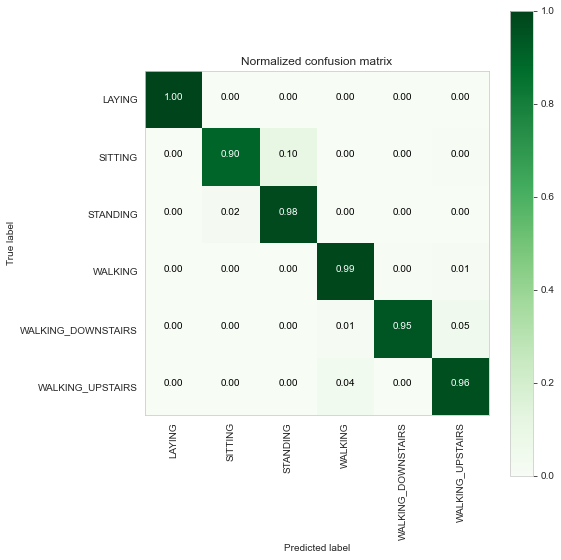

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [41]:

from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters,n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

## 4. Decision Trees with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:08.768632


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.015624


---------------------
|      Accuracy      |
---------------------

    0.8625721072276892


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 361 130   0   0   0]
 [  0  59 473   0   0   0]
 [  0   0   0 473  17   6]
 [  0   0   0  23 350  47]
 [  0   0   0  86  37 348]]


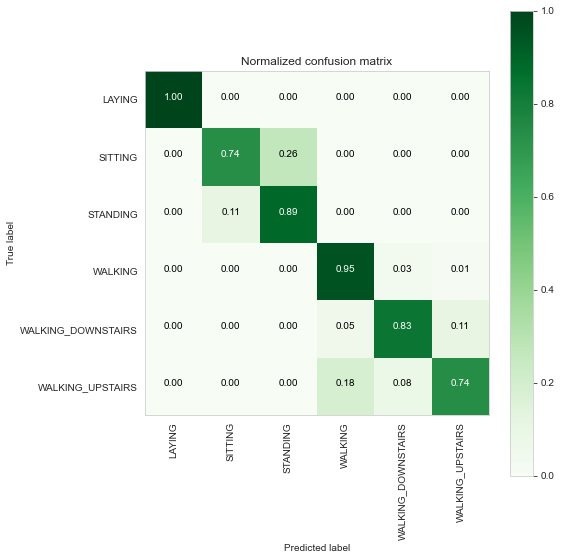

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.74      0.79       491
          STANDING       0.78      0.89      0.83       532
           WALKING       0.81      0.95      0.88       496
WALKING_DOWNSTAIRS       0.87      0.83      0.85       420
  WALKING_UPSTAIRS       0.87      0.74      0.80       471

          accuracy                           0.86      2947
         macro avg       0.87      0.86      0.86      2947
      weighted avg       0.87      0.86      0.86      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=9)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 9}

---------------------------------
|   No of CrossValidation sets

In [42]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=8)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

## 5. Random Forest Classifier with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:04:48.825445


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.015622


---------------------
|      Accuracy      |
---------------------

    0.9161859518154055


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 426  65   0   0   0]
 [  0  41 491   0   0   0]
 [  0   0   0 475   5  16]
 [  0   0   0  23 352  45]
 [  0   0   0  47   5 419]]


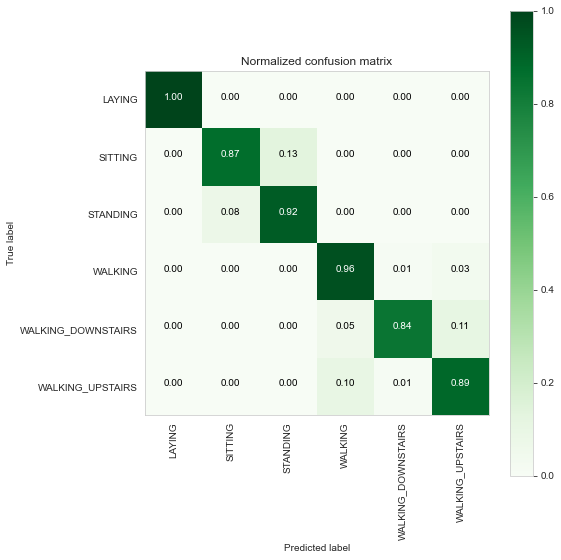

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.87      0.89       491
          STANDING       0.88      0.92      0.90       532
           WALKING       0.87      0.96      0.91       496
WALKING_DOWNSTAIRS       0.97      0.84      0.90       420
  WALKING_UPSTAIRS       0.87      0.89      0.88       471

          accuracy                           0.92      2947
         macro avg       0.92      0.91      0.91      2947
      weighted avg       0.92      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=13, n_estimators=30)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 13, 'n_estimators': 30}

-------------------------

In [43]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=8)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

## 6. Gradient Boosted Decision Trees With GridSearch

from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=8)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

## 7. Comparing all models

In [44]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

# print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
#                                                           100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
#print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
#                                                        100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 95.79%       4.208%
Linear SVC          : 96.67%       3.325% 
DecisionTree        : 86.26%      13.74% 
Random Forest       : 91.62%      8.381% 


In [45]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

pca.fit(X_train)
pca.fit(X_test)

train_x_pca = pca.transform(X_train)
test_x_pca = pca.transform(X_test)

print(pca.n_components_)
print(pca.explained_variance_)

65
[31.1516897   2.47957644  1.72801715  0.93624998  0.80927059  0.70307094
  0.57836154  0.54097623  0.51569242  0.49238301  0.44981654  0.39351278
  0.35518845  0.33941649  0.29807688  0.29213102  0.27693937  0.26038055
  0.24507816  0.23198325  0.22422626  0.21997862  0.20229092  0.19280788
  0.18193948  0.1777047   0.17094888  0.16801684  0.15733446  0.1523503
  0.15101798  0.14208761  0.13423566  0.13305442  0.12782559  0.12574463
  0.12269556  0.11546559  0.11239565  0.10778485  0.10535992  0.10029402
  0.09778064  0.09737234  0.09180965  0.08988298  0.08708879  0.08424036
  0.08053919  0.07790588  0.07597251  0.07418504  0.07163421  0.0668692
  0.06643898  0.06529754  0.06475348  0.06392465  0.06269405  0.05911024
  0.05792184  0.05558897  0.0543989   0.05374383  0.05279251]


In [46]:
ex_variance = np.var(train_x_pca,axis=0)
print(ex_variance)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[34.68899056  2.47568655  2.38181366  0.80970207  0.80037893  0.58652142
  0.49934139  0.5186112   0.52687045  0.61864426  0.48211609  0.38263184
  0.3041977   0.33783866  0.20314219  0.31718069  0.27961752  0.23058735
  0.23584908  0.20771336  0.18130814  0.20953751  0.20114271  0.19968419
  0.19413978  0.17407442  0.16725704  0.16217103  0.15727686  0.13525845
  0.13488431  0.14061227  0.1628025   0.14158119  0.12663896  0.12605157
  0.13625402  0.11644447  0.11450545  0.11165838  0.12005     0.11180125
  0.11332663  0.117054    0.11972311  0.09210454  0.09232245  0.08895045
  0.09118501  0.08257681  0.08147657  0.09354423  0.07314367  0.07602796
  0.0822365   0.07014601  0.07484013  0.07154152  0.07626566  0.0777445
  0.06796391  0.06548582  0.06820691  0.06447671  0.05798097]
[0.66567637 0.04750804 0.04570664 0.01553806 0.01535915 0.01125526
 0.00958228 0.00995207 0.01011056 0.01187169 0.00925173 0.00734265
 0.00583751 0.00648307 0.00389827 0.00608665 0.00536582 0.00442494
 0.00452

In [47]:
ex_variance = np.var(test_x_pca,axis=0)
print(ex_variance)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[31.14111906  2.47873505  1.72743078  0.93593229  0.80899599  0.70283237
  0.57816529  0.54079266  0.51551743  0.49221593  0.4496639   0.39337925
  0.35506793  0.33930132  0.29797573  0.29203189  0.2768454   0.26029219
  0.24499499  0.23190453  0.22415017  0.21990398  0.20222228  0.19274245
  0.18187774  0.1776444   0.17089087  0.16795983  0.15728107  0.15229861
  0.15096673  0.1420394   0.13419011  0.13300927  0.12778221  0.12570196
  0.12265392  0.11542641  0.11235751  0.10774827  0.10532417  0.10025999
  0.09774746  0.0973393   0.0917785   0.08985248  0.08705924  0.08421178
  0.08051186  0.07787945  0.07594673  0.07415987  0.0716099   0.06684651
  0.06641644  0.06527539  0.0647315   0.06390296  0.06267278  0.05909018
  0.05790218  0.05557011  0.05438044  0.0537256   0.05277459]
[0.64824647 0.05159838 0.03595892 0.01948276 0.0168404  0.01463045
 0.01203533 0.01125736 0.01073122 0.01024617 0.00936039 0.00818875
 0.00739124 0.00706304 0.00620279 0.00607906 0.00576293 0.00541835
 0.0050

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:00.440127


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00


---------------------
|      Accuracy      |
---------------------

    0.9375636240244316


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  1 418  69   0   0   3]
 [  0  28 502   2   0   0]
 [  0   0   0 491   5   0]
 [  0   0   2   6 405   7]
 [  0   0   0  49  12 410]]


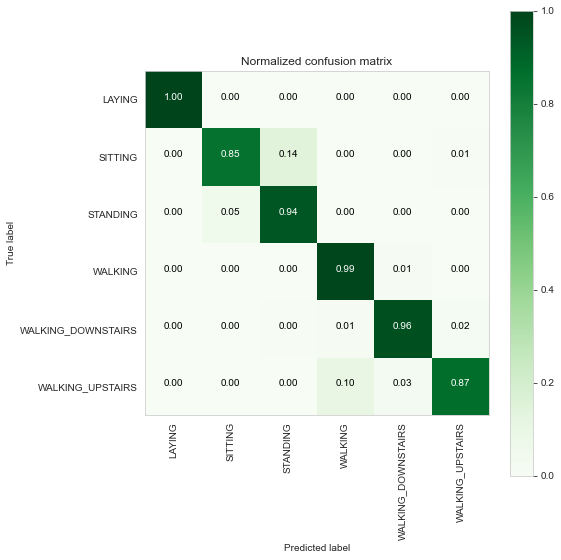

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.94      0.85      0.89       491
          STANDING       0.88      0.94      0.91       532
           WALKING       0.90      0.99      0.94       496
WALKING_DOWNSTAIRS       0.96      0.96      0.96       420
  WALKING_UPSTAIRS       0.98      0.87      0.92       471

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947



In [48]:
lvc = LinearSVC()
lr_svc_grid_results2 = perform_model(lvc, train_x_pca, y_train, test_x_pca, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:00.428994


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00


---------------------
|      Accuracy      |
---------------------

    0.9375636240244316


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  1 418  69   0   0   3]
 [  0  28 502   2   0   0]
 [  0   0   0 491   5   0]
 [  0   0   2   6 405   7]
 [  0   0   0  49  12 410]]


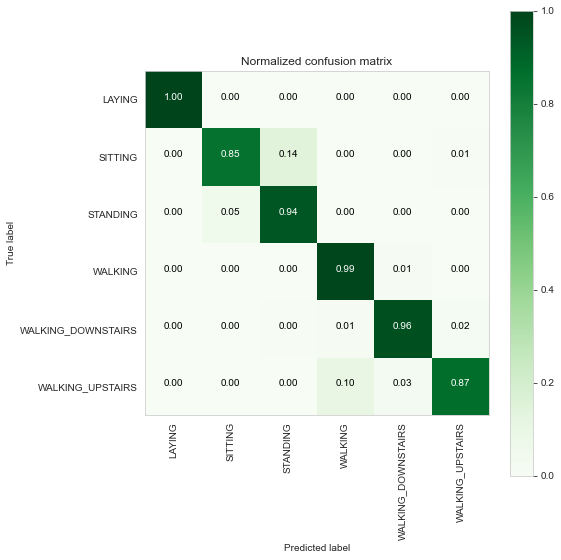

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.94      0.85      0.89       491
          STANDING       0.88      0.94      0.91       532
           WALKING       0.90      0.99      0.94       496
WALKING_DOWNSTAIRS       0.96      0.96      0.96       420
  WALKING_UPSTAIRS       0.98      0.87      0.92       471

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947



In [49]:
lr_svc_grid_results2 = perform_model(lvc, train_x_pca, y_train, test_x_pca, y_test, class_labels=labels)

In [50]:
# function to normalise data

def standardise(X_train,X_test):
    ss=StandardScaler().fit(X_train)
    X_train=ss.transform(X_train)
    X_test=ss.transform(X_test)
    return X_train,X_test

# function to reduce dimensions of data
def reduce_pca(X_train,X_test,comp):
    X_train,X_test=standardise(X_train,X_test)
    model=PCA(n_components=comp,whiten=True)
    X_train=model.fit_transform(X_train)
    X_test=model.transform(X_test)
    return X_train,X_test


In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [52]:
X_tr,X_t = reduce_pca(X_train,X_test,330)


In [53]:
X_tr.shape

(7352, 330)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:01.602986


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00


---------------------
|      Accuracy      |
---------------------

    0.9467254835425857


--------------------
| Confusion Matrix |
--------------------

 [[515   0  22   0   0   0]
 [  5 418  66   0   0   2]
 [  0  14 517   1   0   0]
 [  0   2   0 486   0   8]
 [  0   7  10   2 397   4]
 [  0   1   6   7   0 457]]


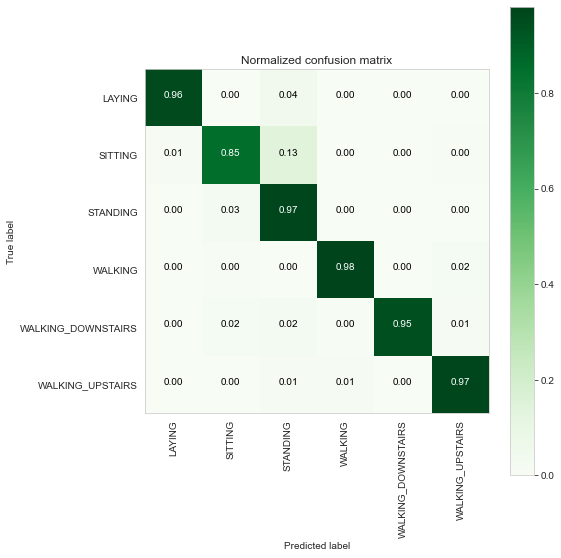

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       0.99      0.96      0.97       537
           SITTING       0.95      0.85      0.90       491
          STANDING       0.83      0.97      0.90       532
           WALKING       0.98      0.98      0.98       496
WALKING_DOWNSTAIRS       1.00      0.95      0.97       420
  WALKING_UPSTAIRS       0.97      0.97      0.97       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



In [54]:

lvc = LinearSVC()
lr_svc_grid_results2 = perform_model(lvc, X_tr, y_train, X_t, y_test, class_labels=labels)

In [43]:
# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values
# load a list of files and return as a 3d numpy array

def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
        # stack group so that features are the 3rd dimension
    loaded = dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'data/UCI HAR Dataset/')
    print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'data/UCI HAR Dataset/')
    print(testX.shape, testy.shape)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy

In [44]:
trainX, trainy, testX, testy = load_dataset()

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)


In [45]:
#!pip install keras_visualizer
# !pip install pydot

In [46]:
import pydot
from keras.utils import plot_model

In [47]:
def scale_data(X_train, X_test):
    # remove overlap: the data is split into windows of 128 time
    # steps, with a 50% overlap. To do it properly we must first
    # remove the duplicated before fitting the StandardScaler()
    cut = int(X_train.shape[1] / 2)
    longX = X_train[:, -cut:, :]
    # flatten windows
    longX = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))
    # flatten train and test
    flatTrainX = X_train.reshape((X_train.shape[0] * X_train.shape[1], X_train.shape[2]))
    flatTestX = X_test.reshape((X_test.shape[0] * X_test.shape[1], X_test.shape[2]))
    # standardize
    s = StandardScaler()
    # fit on training data
    s.fit(longX)
    # apply to training, test and validation data
    flatTrainX = s.transform(flatTrainX)
    flatTestX = s.transform(flatTestX)
    # reshape
    flatTrainX = flatTrainX.reshape((X_train.shape))
    flatTestX = flatTestX.reshape((X_test.shape))
   

    return flatTrainX, flatTestX

In [48]:
def plot_acc_curve(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [49]:
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.layers import Conv2DTranspose
# from tensorflow.keras.layers import LeakyReLU
# from tensorflow.keras.layers import Activation
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Reshape
# from tensorflow.keras.layers import Input
# from tensorflow.keras.models import Model
# from tensorflow.keras import backend as K
# import numpy as np
# from tensorflow.keras.optimizers import Adam

# def convAutoencoderbuild(width, height, depth, filters=(9,18), latentDim=9):
#     # initialize the input shape to be "channels last" along with
#     # the channels dimension itself
#     # channels dimension itself
#     inputShape = (height, width, depth)
#     chanDim = -1
#     # define the input to the encoder
#     inputs = Input(shape=inputShape)
#     #print(inputs.shape)
#     x = inputs
#     print(x.shape)
#     # loop over the number of filters
#     for f in filters:
#         # apply a CONV => RELU => BN operation
#         print(x.shape)
#         x = Conv2D(f, (3, 3))(x)
#         x = LeakyReLU(alpha=0.2)(x)
#         x = BatchNormalization(axis=chanDim)(x)
#     # flatten the network and then construct our latent vector
#     print(x.shape)
#     volumeSize = K.int_shape(x)
#     x = Flatten()(x)
#     latent = Dense(latentDim)(x)
#     # build the encoder model
#     encoder = Model(inputs, latent, name="encoder")

#     # start building the decoder model which will accept the
#     # output of the encoder as its inputs
#     latentInputs = Input(shape=(latentDim,))
#     x = Dense(np.prod(volumeSize[1:]))(latentInputs)
#     x = Reshape((volumeSize[1], volumeSize[2], volumeSize[3]))(x)
#     # loop over our number of filters again, but this time in
#     # reverse order
#     #print(filters[::-1])
#     for f in filters[::-1]:
#         # apply a CONV_TRANSPOSE => RELU => BN operation
#         x = Conv2DTranspose(f, (3, 3))(x)
        
#         x = LeakyReLU(alpha=0.2)(x)
#         x = BatchNormalization(axis=chanDim)(x)
#     print(x.shape)
#     # apply a single CONV_TRANSPOSE layer used to recover the
#     # original depth of the image
#     x = Conv2DTranspose(depth, (3, 3), padding="same")(x)
#     outputs = Activation("softmax")(x)
#     # build the decoder model
#     #print(x.shape)
#     decoder = Model(latentInputs, outputs, name="decoder")
#     # our autoencoder is the encoder + decoder
#     autoencoder = Model(inputs, decoder(encoder(inputs)),name="autoencoder")
#     # return a 3-tuple of the encoder, decoder, and autoencoder
#     return (encoder, decoder, autoencoder)


In [50]:
# EPOCHS = 20
# INIT_LR = 1e-3
# BS = 32
# (encoder, decoder, autoencoder) = convAutoencoderbuild(9, 128, 1)
# opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# autoencoder.compile(loss="mse", optimizer=opt)
# print(autoencoder.summary())
# X = trainX.reshape(list(trainX.shape) + [1])
# tX= testX.reshape(list(testX.shape) + [1])
# #train the convolutional autoencoder
# H = autoencoder.fit(
#     X, X,
#     validation_data=(tX, tX),
#     epochs=EPOCHS,
#     batch_size=BS)

In [51]:
# decodedtrainX = autoencoder.predict(trainX)
# decodedtestX = autoencoder.predict(testX)

In [52]:
# decodedtestX.reshape

In [69]:
def evaluate_model(X_train, y_train, X_test, y_test, kernel, verbose=1):
    X_train, X_test = scale_data(X_train, X_test)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

    epochs, batch_size = 30, 64
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

    model = Sequential()
    model.add(Conv1D(filters=84, kernel_size=kernel[0], activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=84, kernel_size=kernel[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling1D(pool_size=2))

    model.add(LSTM(units=60, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=65))
    model.add(Dropout(0.2))

    model.add(Dense(units=65))
    model.add(Dense(units=n_outputs, activation="softmax"))

    # Reduce the learning rate once the learning stagnates, it is good in order
    # try to scratch those last decimals of accuracy.
    reduce_lr = ReduceLROnPlateau(monitor='accuracy',
                                  factor=0.1,
                                  patience=4,
                                  verbose=verbose,
                                  min_delta=0.001,
                                  mode='max')

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # Save an image of the model architecture
    plot_model(model, show_layer_names=False, show_shapes=True, to_file='CNN_LSTM.png')

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
              verbose=verbose, shuffle=True,
              #callbacks=[reduce_lr],
             validation_data=(X_val,y_val))
    
    plot_acc_curve(history)

    _, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)
    return accuracy, history

In [64]:
# #LSTM + CNN
# def evaluate_model2(X_train, y_train, X_test, y_test, kernel, verbose=1):
#     #X_train, X_test, X_val = scale_data(X_train, X_test, X_val)

#     epochs, batch_size = 30, 64
#     n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

#     model = Sequential()
#     model.add(Conv1D(filters=84, kernel_size=2, activation='relu', input_shape=(n_timesteps, n_features)))
#     model.add(Conv1D(filters=84, kernel_size=2, activation='relu'))
#     model.add(Dropout(0.3))
#     model.add(MaxPooling1D(pool_size=2))

#     model.add(LSTM(units=60, return_sequences=True))
#     model.add(Dropout(0.2))
#     model.add(LSTM(units=65))
#     model.add(Dropout(0.2))

#     model.add(Dense(units=65))
#     model.add(Dense(units=n_outputs, activation="softmax"))

#     # Reduce the learning rate once the learning stagnates, it is good in order
#     # try to scratch those last decimals of accuracy.
#     reduce_lr = ReduceLROnPlateau(monitor='accuracy',
#                                   factor=0.1,
#                                   patience=4,
#                                   verbose=verbose,
#                                   min_delta=0.001,
#                                   mode='max')

#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     # Save an image of the model architecture
#     # plot_model(model, show_shapes=True, to_file='data/img_models/CNN_1D_LSTM.png')

#     model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
#               verbose=verbose, shuffle=True,
#               #callbacks=[reduce_lr]
#              )

#     _, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)
#     return accuracy

In [56]:
# fit and evaluate a model
def evaluate_LSTM_model(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 1, 15, 64
    trainX, X_val, trainy, y_val = train_test_split(trainX, trainy, test_size=0.2, random_state=1)
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    model = Sequential()
    model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network

    history = model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(X_val,y_val))
    plot_acc_curve(history)
    plot_model(model, show_layer_names=False, show_shapes=True, to_file='LSTM.png')
    #model.save('/content/drive/My Drive/Colab Notebooks/LAR/LSTM.hdf5')
    # evaluate model
    _, accuracy = model.evaluate(testX, testy,batch_size=batch_size, verbose=1)
    return accuracy, model

Epoch 1/15
92/92 [==============================] - 9s 73ms/step - loss: 1.4191 - accuracy: 0.4195 - val_loss: 0.9765 - val_accuracy: 0.5717
Epoch 2/15
92/92 [==============================] - 7s 72ms/step - loss: 0.8794 - accuracy: 0.6260 - val_loss: 0.6692 - val_accuracy: 0.6900
Epoch 3/15
92/92 [==============================] - 7s 74ms/step - loss: 0.6448 - accuracy: 0.7318 - val_loss: 0.6181 - val_accuracy: 0.7478
Epoch 4/15
92/92 [==============================] - 6s 69ms/step - loss: 0.6387 - accuracy: 0.7214 - val_loss: 0.5107 - val_accuracy: 0.7933
Epoch 5/15
92/92 [==============================] - 6s 68ms/step - loss: 0.4953 - accuracy: 0.8031 - val_loss: 0.4585 - val_accuracy: 0.7933
Epoch 6/15
92/92 [==============================] - 6s 66ms/step - loss: 0.4686 - accuracy: 0.8096 - val_loss: 0.3769 - val_accuracy: 0.8756
Epoch 7/15
92/92 [==============================] - 7s 74ms/step - loss: 0.2902 - accuracy: 0.8963 - val_loss: 0.1987 - val_accuracy: 0.9252
Epoch 8/15
92

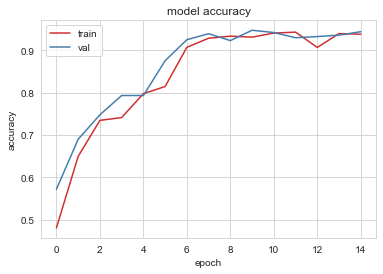

47/47 [==============================] - 1s 19ms/step - loss: 0.3216 - accuracy: 0.8894


In [251]:
score = evaluate_LSTM_model(trainX, trainy, testX, testy)

In [117]:
score

0.9080420732498169

In [121]:
trainX.shape

(7352, 128, 9)

Epoch 1/30
81/81 [==============================] - 6s 42ms/step - loss: 0.3743 - accuracy: 0.5119 - val_loss: 0.0931 - val_accuracy: 0.9152
Epoch 2/30
81/81 [==============================] - 3s 36ms/step - loss: 0.0869 - accuracy: 0.9094 - val_loss: 0.0519 - val_accuracy: 0.9411
Epoch 3/30
81/81 [==============================] - 3s 36ms/step - loss: 0.0500 - accuracy: 0.9494 - val_loss: 0.0463 - val_accuracy: 0.9402
Epoch 4/30
81/81 [==============================] - 3s 38ms/step - loss: 0.0475 - accuracy: 0.9450 - val_loss: 0.0408 - val_accuracy: 0.9488
Epoch 5/30
81/81 [==============================] - 3s 36ms/step - loss: 0.0476 - accuracy: 0.9450 - val_loss: 0.0401 - val_accuracy: 0.9479
Epoch 6/30
81/81 [==============================] - 3s 36ms/step - loss: 0.0401 - accuracy: 0.9512 - val_loss: 0.0342 - val_accuracy: 0.9574
Epoch 7/30
81/81 [==============================] - 3s 36ms/step - loss: 0.0381 - accuracy: 0.9521 - val_loss: 0.0379 - val_accuracy: 0.9547
Epoch 8/30
81

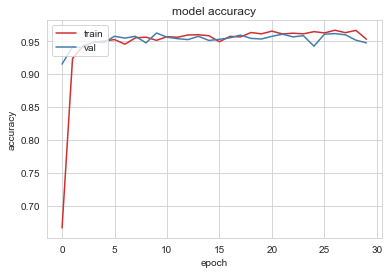

47/47 [==============================] - 0s 10ms/step - loss: 0.0907 - accuracy: 0.9040


In [70]:

k=((3, 3))
score,history = evaluate_model(trainX, trainy,testX , testy,kernel=k)

# for k in kernel:
#     print("#Kernel:", k)
# # repeat experiment
#     scores = list()
#     for r in range(5):
#         score = evaluate_model(X_train, y_train, X_test, y_test,
#                                kernel=k)
#         score = score * 100.0
#         print('> Rep_%d: %.3f' % (r + 1, score))
#         scores.append(score)
#         all_scores.append(scores)

In [68]:
score


0.910417377948761

In [67]:
# def evaluate_cnn_model(trainX, trainy, testX, testy):
#     verbose, epochs, batch_size = 1, 15, 64
#     n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
   
#     model = Sequential()

#     model.add(Conv1D(32, 3, input_shape=(n_timesteps,n_features), activation='relu',kernel_initializer = 'he_normal'))
#     model.add(MaxPooling1D(2))
#     model.add(Dropout(0.2))
#     model.add(BatchNormalization())


#     model.add(Conv1D(64, 3, activation='relu',kernel_initializer = 'he_normal'))
#     model.add(MaxPooling1D(2))
#     model.add(BatchNormalization())
#     #model_dynamic.add(Dropout(0.2))

#     model.add(Conv1D(80, 3,  activation='relu',kernel_initializer = 'he_normal'))
#     model.add(MaxPooling1D(2))
#     model.add(Dropout(0.2))
#     model.add(BatchNormalization())

#     model.add(Flatten())

#     model.add(Dense(n_outputs, activation='sigmoid'))


#     model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = 'adam')

#     #model.summary()
#     model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
#     plot_model(model, show_layer_names=False, show_shapes=True, to_file='CNN.png')
#     #model.save('/content/drive/My Drive/Colab Notebooks/LAR/LSTM.hdf5')
#     # evaluate model
#     _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=1)
#     return accuracy, model
    

In [61]:
def evaluate_cnn_model(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 1, 15, 32
    trainX, X_val, trainy, y_val = train_test_split(trainX, trainy, test_size=0.2, random_state=1)
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    plot_model(model, show_layer_names=False, show_shapes=True, to_file='CNN.png')
    history = model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(X_val,y_val))
    plot_acc_curve(history)
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=1)
    return accuracy, model

Epoch 1/15
184/184 [==============================] - 2s 8ms/step - loss: 0.7826 - accuracy: 0.6848 - val_loss: 0.2357 - val_accuracy: 0.9130
Epoch 2/15
184/184 [==============================] - 1s 7ms/step - loss: 0.1916 - accuracy: 0.9275 - val_loss: 0.1415 - val_accuracy: 0.9381
Epoch 3/15
184/184 [==============================] - 1s 8ms/step - loss: 0.1324 - accuracy: 0.9485 - val_loss: 0.1497 - val_accuracy: 0.9436
Epoch 4/15
184/184 [==============================] - 2s 9ms/step - loss: 0.1235 - accuracy: 0.9505 - val_loss: 0.1232 - val_accuracy: 0.9504
Epoch 5/15
184/184 [==============================] - 2s 9ms/step - loss: 0.1141 - accuracy: 0.9541 - val_loss: 0.1240 - val_accuracy: 0.9483
Epoch 6/15
184/184 [==============================] - 2s 9ms/step - loss: 0.0962 - accuracy: 0.9591 - val_loss: 0.1171 - val_accuracy: 0.9497
Epoch 7/15
184/184 [==============================] - 1s 7ms/step - loss: 0.1098 - accuracy: 0.9511 - val_loss: 0.1231 - val_accuracy: 0.9402
Epoch 

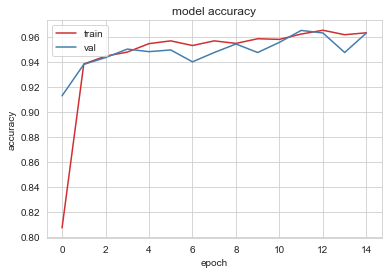

93/93 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.9148


(0.9148286581039429,
 <tensorflow.python.keras.engine.sequential.Sequential at 0x19d0527fca0>)

In [62]:
score = evaluate_cnn_model(trainX, trainy, testX, testy)
score

In [70]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF,DotProduct,ConstantKernel,RationalQuadratic, ExpSineSquared

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:14:02.261531


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:04:04.172723


---------------------
|      Accuracy      |
---------------------

    0.9463861554122837


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  1 434  53   0   0   3]
 [  0  22 510   0   0   0]
 [  0   0   0 489   7   0]
 [  0   0   0  25 362  33]
 [  0   0   0  12   2 457]]


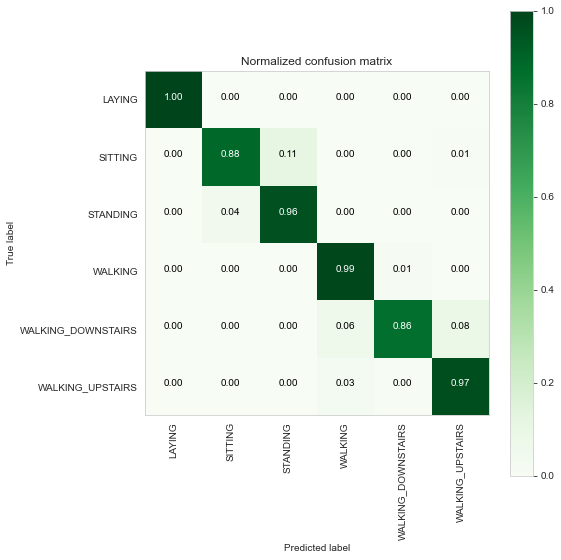

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.95      0.88      0.92       491
          STANDING       0.91      0.96      0.93       532
           WALKING       0.93      0.99      0.96       496
WALKING_DOWNSTAIRS       0.98      0.86      0.92       420
  WALKING_UPSTAIRS       0.93      0.97      0.95       471

          accuracy                           0.95      2947
         macro avg       0.95      0.94      0.94      2947
      weighted avg       0.95      0.95      0.95      2947



In [71]:
#kernel = 1*RBF(1.0)

#model = GaussianProcessClassifier(optimizer=None)

kernel  = 0.2**2 * RBF(length_scale=0.11) + RBF(length_scale=1.71) + RBF(length_scale=4)

#kernel after optimization
gp_reg = GaussianProcessClassifier(kernel,
                                    copy_X_train=True,
                                    n_restarts_optimizer=2,
                                    optimizer= None #uncomment this for tuning hyper params
                                 )


gp_results = perform_model(gp_reg, X_train, y_train, X_test, y_test, class_labels=labels)

In [72]:
gp_results

{'training_time': datetime.timedelta(seconds=842, microseconds=261531),
 'testing_time': datetime.timedelta(seconds=244, microseconds=172723),
 'predicted': array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
        'WALKING_UPSTAIRS', 'WALKING'], dtype='<U18'),
 'accuracy': 0.9463861554122837,
 'confusion_matrix': array([[537,   0,   0,   0,   0,   0],
        [  1, 434,  53,   0,   0,   3],
        [  0,  22, 510,   0,   0,   0],
        [  0,   0,   0, 489,   7,   0],
        [  0,   0,   0,  25, 362,  33],
        [  0,   0,   0,  12,   2, 457]], dtype=int64),
 'classification_report': '                    precision    recall  f1-score   support\n\n            LAYING       1.00      1.00      1.00       537\n           SITTING       0.95      0.88      0.92       491\n          STANDING       0.91      0.96      0.93       532\n           WALKING       0.93      0.99      0.96       496\nWALKING_DOWNSTAIRS       0.98      0.86      0.92       420\n  WALKING_UPSTAIR

In [73]:
# # grid search kernel for gaussian process classifier
# from sklearn.datasets import make_classification
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.gaussian_process.kernels import DotProduct
# from sklearn.gaussian_process.kernels import Matern
# from sklearn.gaussian_process.kernels import RationalQuadratic
# from sklearn.gaussian_process.kernels import WhiteKernel
# # define dataset
# #X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# # define model
# model = GaussianProcessClassifier()
# # define model evaluation method
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # define grid
# grid = dict()
# grid['kernel'] = [1*RBF(), 1*DotProduct(), 1*Matern(),  1*RationalQuadratic(), 1*WhiteKernel()]
# # define search
# search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)


In [74]:
# # perform the search
# results = search.fit(X_train, y_train)
# # summarize best
# print('Best Mean Accuracy: %.3f' % results.best_score_)
# print('Best Config: %s' % results.best_params_)
# # summarize all
# means = results.cv_results_['mean_test_score']
# params = results.cv_results_['params']
# for mean, param in zip(means, params):
#     print(">%.3f with: %r" % (mean, param))

In [75]:
timesteps = 3
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
n_outputs

6

In [76]:
trainy.shape

(7352, 6)

In [77]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *

In [78]:
# epochs = 100
# batch_size = 32
# window_length = 4
# from keras import metrics
# import keras
# import tensorflow as tf
# import os

# early_stop = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', min_delta=1e-2, patience=5, verbose=0, mode='auto',
#     baseline=None, restore_best_weights=True)

# model = keras.Sequential()
# model.add(keras.layers.LSTM(128, kernel_initializer='he_uniform', batch_input_shape=(None, 128,9), return_sequences=True, name='encoder_1'))
# model.add(keras.layers.LSTM(64, kernel_initializer='he_uniform', return_sequences=True, name='encoder_2'))
# model.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=False, name='encoder_3'))
# model.add(keras.layers.RepeatVector(128, name='encoder_decoder_bridge'))
# model.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='decoder_1'))
# model.add(keras.layers.LSTM(64, kernel_initializer='he_uniform', return_sequences=True, name='decoder_2'))
# model.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='decoder_3'))
# model.add(keras.layers.TimeDistributed(keras.layers.Dense(9)))
# model.compile(loss="mse",optimizer='adam')
# model.build()
# print(model.summary())

# model.fit(x=trainX, y=trainX, epochs=10, batch_size=batch_size, shuffle=True, callbacks=[early_stop])


In [79]:
inp = Input(shape=(trainX.shape[1], trainX.shape[2]))
    
encoder = TimeDistributed(Dense(200, activation='tanh'))(inp)
encoder = TimeDistributed(Dense(50, activation='tanh'))(encoder)
latent = TimeDistributed(Dense(10, activation='tanh'))(encoder)
decoder = TimeDistributed(Dense(50, activation='tanh'))(latent)
decoder = TimeDistributed(Dense(200, activation='tanh'))(decoder)
out = TimeDistributed(Dense(9))(decoder)
autoencoder = Model(inputs=inp, outputs=out)
autoencoder.compile(optimizer='adam', loss='mse')

In [80]:
tx = np.concatenate((trainX, testX))
tx.shape

(10299, 128, 9)

In [81]:
es = EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, verbose=1, patience=0)


autoencoder.fit(tx,tx, epochs=50, verbose=2, callbacks=[es])

Epoch 1/50
322/322 - 2s - loss: 0.0056
Epoch 2/50
322/322 - 2s - loss: 2.5110e-04
Epoch 3/50
322/322 - 2s - loss: 1.8157e-04
Epoch 4/50
322/322 - 2s - loss: 1.3681e-04
Epoch 5/50
322/322 - 2s - loss: 1.1933e-04
Epoch 6/50
322/322 - 2s - loss: 1.0079e-04
Epoch 7/50
322/322 - 2s - loss: 1.0600e-04
Epoch 8/50
322/322 - 2s - loss: 7.6665e-05
Epoch 9/50
322/322 - 2s - loss: 9.0626e-05
Epoch 10/50
322/322 - 2s - loss: 5.6271e-05
Epoch 11/50
322/322 - 2s - loss: 6.4146e-05
Epoch 12/50
322/322 - 2s - loss: 7.1366e-05
Epoch 13/50
322/322 - 2s - loss: 6.9391e-05
Epoch 14/50
322/322 - 2s - loss: 6.3816e-05
Epoch 15/50
322/322 - 2s - loss: 7.9862e-05
Epoch 16/50
322/322 - 2s - loss: 5.7091e-05
Epoch 17/50
322/322 - 2s - loss: 5.5787e-05
Epoch 18/50
322/322 - 2s - loss: 3.6349e-05
Epoch 19/50
322/322 - 2s - loss: 5.9630e-05
Epoch 20/50
322/322 - 2s - loss: 5.0327e-05
Epoch 21/50
322/322 - 2s - loss: 3.6902e-05
Epoch 22/50
322/322 - 2s - loss: 9.0987e-05
Epoch 23/50
322/322 - 2s - loss: 3.9468e-05
E

In [82]:
#model.fit(trainX, trainX, epochs=10, batch_size=5, verbose=0)
# demonstrate reconstruction
trainxa = autoencoder.predict(trainX, verbose=0)
testxa = autoencoder.predict(testX, verbose=0)

In [83]:
trainxa.shape

(7352, 128, 9)

In [84]:
score = evaluate_model(trainxa, trainy, testxa, testy,k)

Epoch 1/10
115/115 [==============================] - 8s 51ms/step - loss: 0.3293 - accuracy: 0.5691
Epoch 2/10
115/115 [==============================] - 6s 52ms/step - loss: 0.0817 - accuracy: 0.9165
Epoch 3/10
115/115 [==============================] - 6s 52ms/step - loss: 0.0621 - accuracy: 0.9318
Epoch 4/10
115/115 [==============================] - 6s 52ms/step - loss: 0.0485 - accuracy: 0.9382
Epoch 5/10
115/115 [==============================] - 6s 52ms/step - loss: 0.0374 - accuracy: 0.9526
Epoch 6/10
115/115 [==============================] - 6s 51ms/step - loss: 0.0502 - accuracy: 0.9427
Epoch 7/10
115/115 [==============================] - 6s 53ms/step - loss: 0.0345 - accuracy: 0.9580
Epoch 8/10
115/115 [==============================] - 6s 52ms/step - loss: 0.0399 - accuracy: 0.9543
Epoch 9/10
115/115 [==============================] - 6s 51ms/step - loss: 0.0306 - accuracy: 0.9635
Epoch 10/10
47/47 [==============================] - 1s 16ms/step - loss: 0.1135 - accuracy

In [85]:
score

0.9009161591529846

In [120]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
class ConvAutoencoder:
	@staticmethod
	def build(width, height, depth, filters=(32, 64), latentDim=16):
		# initialize the input shape to be "channels last" along with
		# the channels dimension itself
		# channels dimension itself
		inputShape = (height, width, depth)
		chanDim = -1
		# define the input to the encoder
		inputs = Input(shape=inputShape)
		x = inputs
		# loop over the number of filters
		for f in filters:
			# apply a CONV => RELU => BN operation
			x = Conv2D(f, (3, 3), strides=2, padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)
		# flatten the network and then construct our latent vector
		volumeSize = K.int_shape(x)
		x = Flatten()(x)
		latent = Dense(latentDim)(x)
		# build the encoder model
		encoder = Model(inputs, latent, name="encoder")